# King County House Sales Data Analysis

## Overview

This project explores different components of location and details of homes in King County, which is located in Washington state of the U.S. Regression modeling to analyze house sales shows that the model can be used by real estate agents to predict the price of homes based on a set of location and house features. 

## Business Understanding

The real estate agency should be able to assist homeowners who are looking to buy and sell homes in King County. By understanding the house sales data, the real estate agency can give useful advice to homeowners on how location and characteristics of the home might increase the estimated value of their homes.

## Data Understanding


The King County House Sales dataset includes over 20,000 unique homes with details such as in what zipcode the house is located to the number of bedrooms and bathrooms in each home. The dataset includes the greater Seattle area of Washington. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("data/kc_house_data.csv")

In [3]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data Preparation

The target is to predict price of the home. This analysis looks specifically at features of the home, such as number of bedrooms. Later on, location features will be incorporated based on the analysis of my parter, Jonny Hofmeister. First, I examine and clean the data of any outliers and missing data. Second, I will look into addressing any multicolinearity and scaling. 

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#33 bedrooms is probably a typo...removing this from the dataset
df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [7]:
df = df[df['bedrooms'] < 33]

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159600e+04,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,19220.000000,21533.000000,21596.000000,21596.000000,21596.000000,21596.000000,17754.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,4.580575e+09,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.007596,0.233874,3.409752,7.657946,1788.631506,1971.000787,83.641489,98077.950685,47.560087,-122.213977,1986.650722,12758.656649
std,2.876764e+09,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.086827,0.765702,0.650471,1.173218,827.763251,29.375460,399.957185,53.514040,0.138552,0.140725,685.231768,27275.018316
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308950e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
#checking for any duplicate homes and removing those
df.duplicated('id').value_counts()

False    21419
True       177
dtype: int64

In [10]:
df.drop_duplicates(subset='id', inplace=True)

In [11]:
#checking for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
#waterfront has null values, this feature is examined by Jonny but for consistency, removing this from the dataset
df.dropna(subset=['waterfront'], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19066 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19066 non-null  int64  
 1   date           19066 non-null  object 
 2   price          19066 non-null  float64
 3   bedrooms       19066 non-null  int64  
 4   bathrooms      19066 non-null  float64
 5   sqft_living    19066 non-null  int64  
 6   sqft_lot       19066 non-null  int64  
 7   floors         19066 non-null  float64
 8   waterfront     19066 non-null  float64
 9   view           19009 non-null  float64
 10  condition      19066 non-null  int64  
 11  grade          19066 non-null  int64  
 12  sqft_above     19066 non-null  int64  
 13  sqft_basement  19066 non-null  object 
 14  yr_built       19066 non-null  int64  
 15  yr_renovated   15690 non-null  float64
 16  zipcode        19066 non-null  int64  
 17  lat            19066 non-null  float64
 18  long  

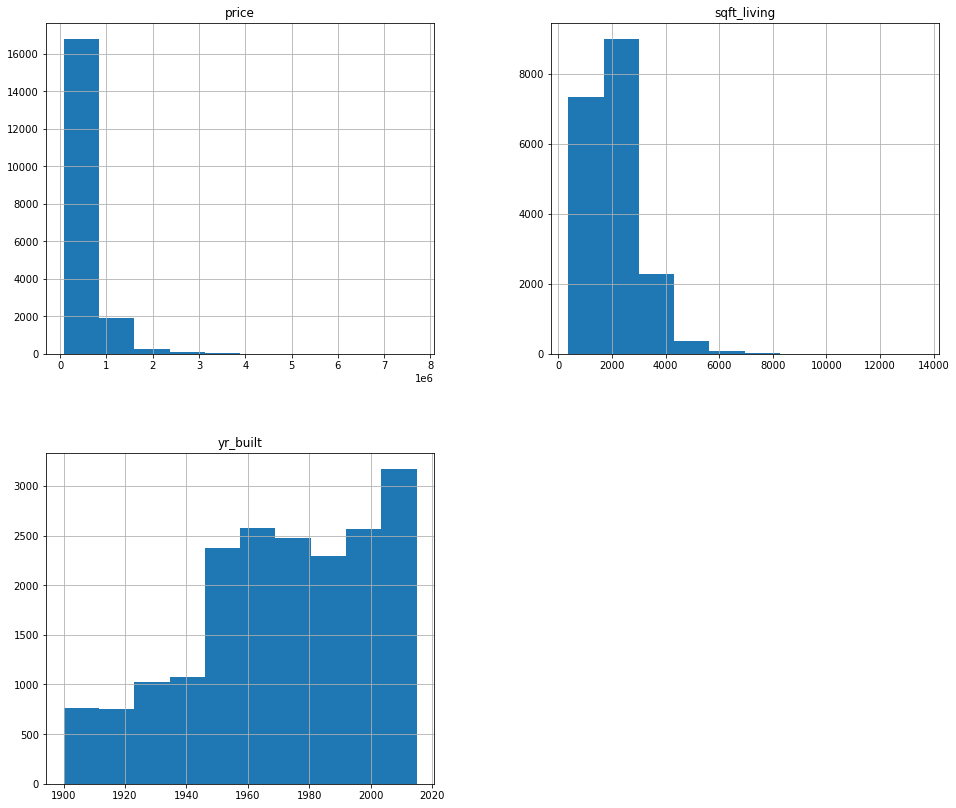

In [14]:
#examining the distribution of each continuous feature I'm interested in by plotting histograms
df[['price', 'sqft_living', 'yr_built']].hist(figsize = [16, 14]);

I can see that these features are slightly skewed, so I will log transform.

In [15]:
continuous = ['price', 'sqft_living', 'yr_built']
df_cont = df[continuous]

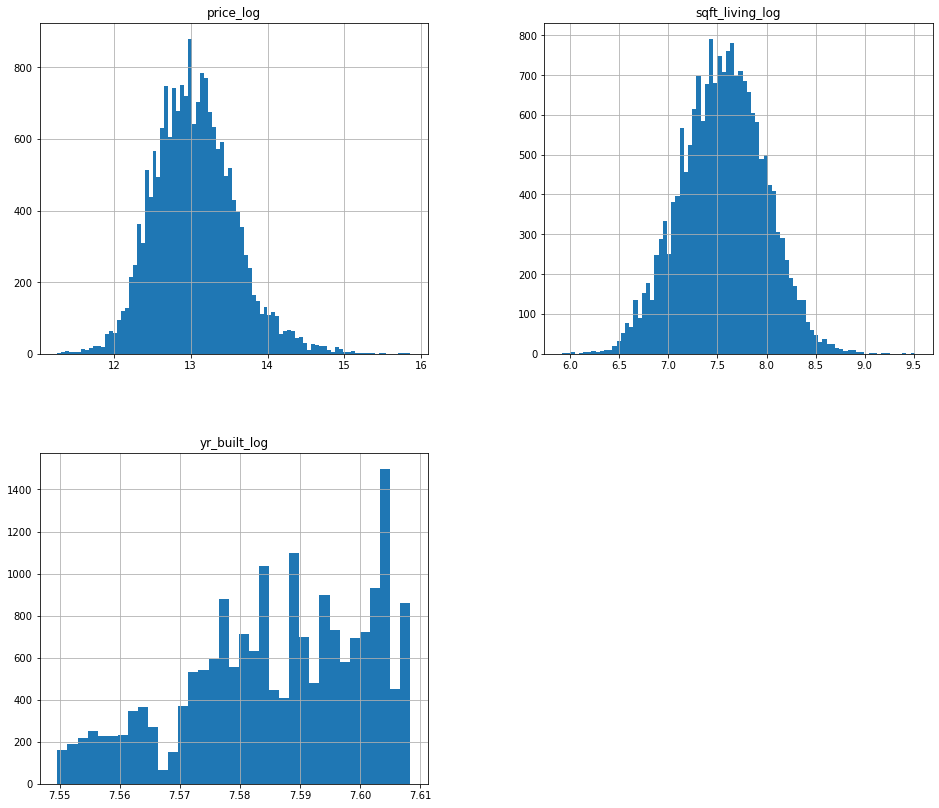

In [16]:
log_fts = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_fts
df_log.hist(figsize=(16, 14), bins='auto');

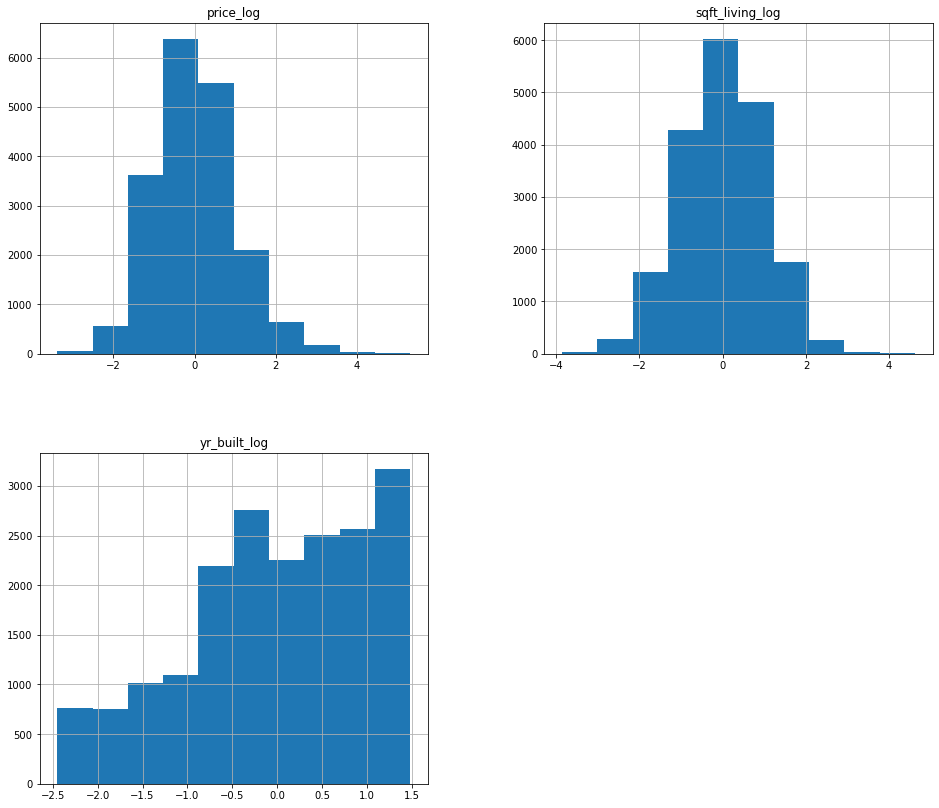

In [17]:
#standardize the continuous features
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_scaled = df_log.apply(normalize)

df_scaled.hist(figsize = [16, 14]);

In [18]:
other_fts = df[['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']]
df = pd.concat([other_fts, df_scaled], axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19066 entries, 1 to 21596
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedrooms         19066 non-null  int64  
 1   bathrooms        19066 non-null  float64
 2   floors           19066 non-null  float64
 3   condition        19066 non-null  int64  
 4   grade            19066 non-null  int64  
 5   price_log        19066 non-null  float64
 6   sqft_living_log  19066 non-null  float64
 7   yr_built_log     19066 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 1.3 MB


## Modeling

### FSM - Baseline Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [21]:
y = df['price_log']

cols = [
    'sqft_living_log', 'yr_built_log', 'bedrooms', 'bathrooms', 'floors',
    'condition', 'grade'
]

X = df[cols]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
train_preds = lr.predict(X_train_scaled)
test_preds = lr.predict(X_test_scaled)

In [25]:
print('Train Scores:')
print(f'R2: {r2_score(y_train, train_preds)}')
print(f'RMSE: {mean_squared_error(y_train, train_preds, squared=False)}')
print('Test Scores:')
print(f'R2: {r2_score(y_test, test_preds)}')
print(f'RMSE: {mean_squared_error(y_test, test_preds, squared=False)}')

Train Scores:
R2: 0.6392566341393783
RMSE: 0.6028801513624461
Test Scores:
R2: 0.6277821454353594
RMSE: 0.6029533346883146


Assessing the Model:

--

### Initial Refinement

Since the data is scaled, I will examine the coefficients to see which are having more of an impact on the model.

I will also check for multicollinearity since many of these features can be closely related and have a colinear relationship. 

In [26]:
dict(zip(X.columns, lr.coef_))

{'sqft_living_log': 0.3264752893870781,
 'yr_built_log': -0.34593443794059675,
 'bedrooms': -0.08082507739781902,
 'bathrooms': 0.1383169418839122,
 'floors': 0.07904507030643074,
 'condition': 0.04702002907533041,
 'grade': 0.528655637051707}

In [27]:
#checking for multicollinearity 
data_pred = df[cols]

data_pred.corr()

,sqft_living_log,yr_built_log,bedrooms,bathrooms,floors,condition,grade
sqft_living_log,1.000000,0.349103,0.640973,0.762262,0.370592,-0.051408,0.744455
yr_built_log,0.349103,1.000000,0.162800,0.504772,0.486049,-0.364010,0.443423
bedrooms,0.640973,0.162800,1.000000,0.531992,0.188965,0.021090,0.372331
bathrooms,0.762262,0.504772,0.531992,1.000000,0.505269,-0.129173,0.666786
floors,0.370592,0.486049,0.188965,0.505269,1.000000,-0.266530,0.457093
condition,-0.051408,-0.364010,0.021090,-0.129173,-0.266530,1.000000,-0.147896
grade,0.744455,0.443423,0.372331,0.666786,0.457093,-0.147896,1.000000


In [28]:
abs(data_pred.corr()) > 0.7

,sqft_living_log,yr_built_log,bedrooms,bathrooms,floors,condition,grade
sqft_living_log,True,False,False,True,False,False,True
yr_built_log,False,True,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False
bathrooms,True,False,False,True,False,False,False
floors,False,False,False,False,True,False,False
condition,False,False,False,False,False,True,False
grade,True,False,False,False,False,False,True


There appears to be two pairs of features that show multicolinearity: sqft_living and bathrooms, sqft_living and grade. 

In [29]:
#dropping bathrooms feature
y = df['price_log']

cols = [
    'sqft_living_log', 'yr_built_log', 'bedrooms', 'floors', 'condition',
    'grade'
]

X = df[cols]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

LinearRegression()

In [32]:
train_preds = lr.predict(X_train_scaled)
test_preds = lr.predict(X_test_scaled)

In [33]:
print('Train Scores:')
print(f'R2: {r2_score(y_train, train_preds)}')
print(f'RMSE: {mean_squared_error(y_train, train_preds, squared=False)}')
print('Test Scores:')
print(f'R2: {r2_score(y_test, test_preds)}')
print(f'RMSE: {mean_squared_error(y_test, test_preds, squared=False)}')

Train Scores:
R2: 0.6331534206624496
RMSE: 0.6079586559349938
Test Scores:
R2: 0.621105381070133
RMSE: 0.6083371227473383


### Model Refinement II

Dropping the bathrooms feature didn't seem to have much of an effect on the model. Although multicollinearity between the features has been reduced, the model's prfromance slightly diminished.

In [ ]:
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

model = Ridge()
visualizer = ResidualsPlot(model)

visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();